Name : J Karan Tejas

Roll No : 191EE126

In [304]:
import numpy as np
import IPython
from IPython.display import Audio , display, Javascript
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, chirp, spectrogram
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd
import pydub
from pydub import AudioSegment
import base64
from google.colab import output

In [305]:
alpha = 1 + 126 % 3  
pi = np.pi

$\alpha = 1$

# Problem 1

Part 1 :

In [333]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

In [334]:
# F1 = 2 + 2a Hz = 4  Hz
F1 = 4
# F2 = 5 + 5a Hz = 10 Hz
F2 = 10

FS = 100

FT = 10

<Figure size 864x432 with 0 Axes>

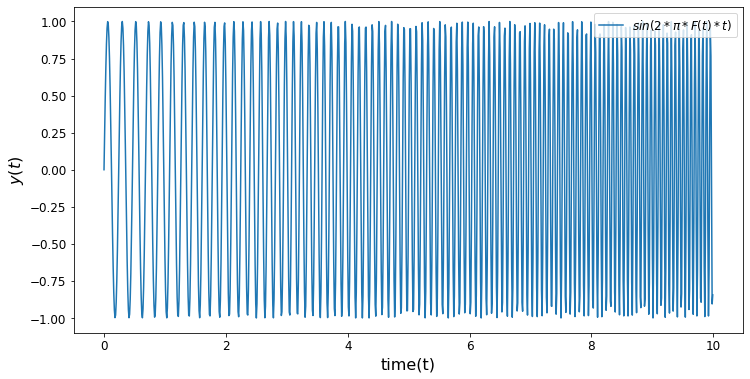

<Figure size 864x432 with 0 Axes>

In [335]:
t = np.arange(0, FT, (1/FS))
ft = np.arange(F1,F2,(F2 - F1)/1000)

signal = np.sin(2*pi*ft*t)

plt.plot(t, signal ,label = r'$sin(2 * \pi  * F(t) *t)$')
plt.legend(loc = 'upper right')
plt.xlabel('time(t)',fontsize = 16)
plt.ylabel('$y(t)$',fontsize = 16)
plt.savefig('q1_signal.png')
plt.figure()

Part 2 :

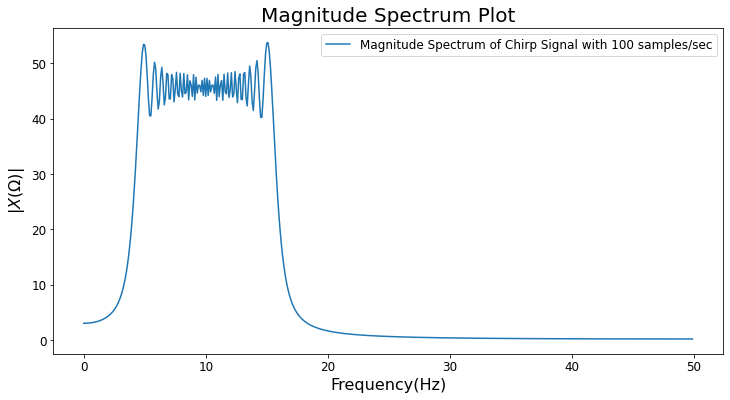

<Figure size 864x432 with 0 Axes>

In [336]:
def plot_mag(x, Fs,max_freq=None,l_label = None,savfile = None) :
  C = int(len(x) / 2)
  if max_freq:
    C = int(C * max_freq / float(Fs) * 2) 
  X = np.abs(fft(x)[0:C])
  N = Fs * np.arange(0, C) / len(x);
  plt.plot(N,X,label = l_label)
  plt.legend(loc = 'upper right')
  plt.title('Magnitude Spectrum Plot', fontsize = 20)
  plt.xlabel('Frequency(Hz)', fontsize = 16)
  plt.ylabel('$|X(\Omega)|$', fontsize = 16)
  plt.savefig(savfile)
  plt.figure()

plot_mag(signal, FS, FS/2,'Magnitude Spectrum of Chirp Signal with 100 samples/sec','q1_p1.png')

Part 3 :

In [337]:
def spectrogram(y, Nos, fs, window=None, title=None,savfile = None):
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = plt.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  plt.title(title, fontsize = 20)
  plt.xlabel(r'$Time(s)$', fontsize = 16)
  plt.ylabel(r'$Frequencies(Hz)$', fontsize = 16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude(dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  plt.savefig(savfile)
  plt.figure()


In [338]:
plt.rcParams.update({
    "figure.figsize": (15,8),
    "font.size": 12})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


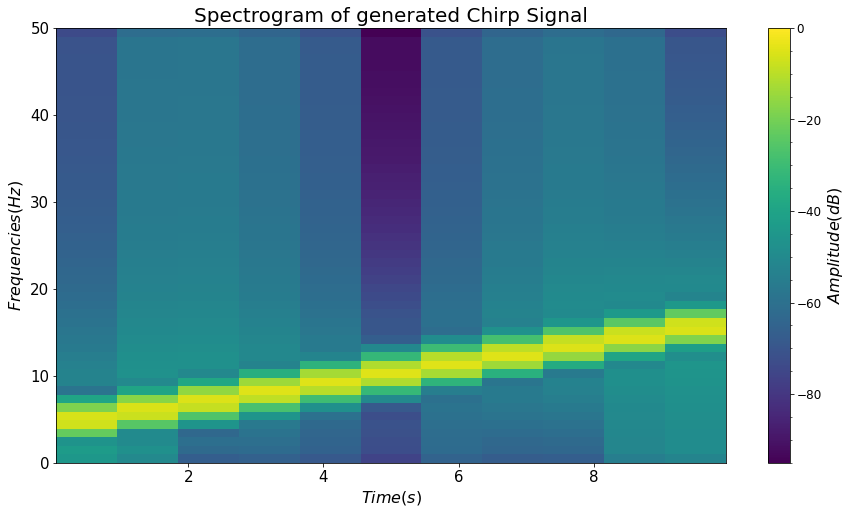

<Figure size 1080x576 with 0 Axes>

In [339]:
fs = 100
Nos = 100
spectrogram(signal, Nos, fs, window='hamming', title = 'Spectrogram of generated Chirp Signal',savfile = 'q1_p2.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


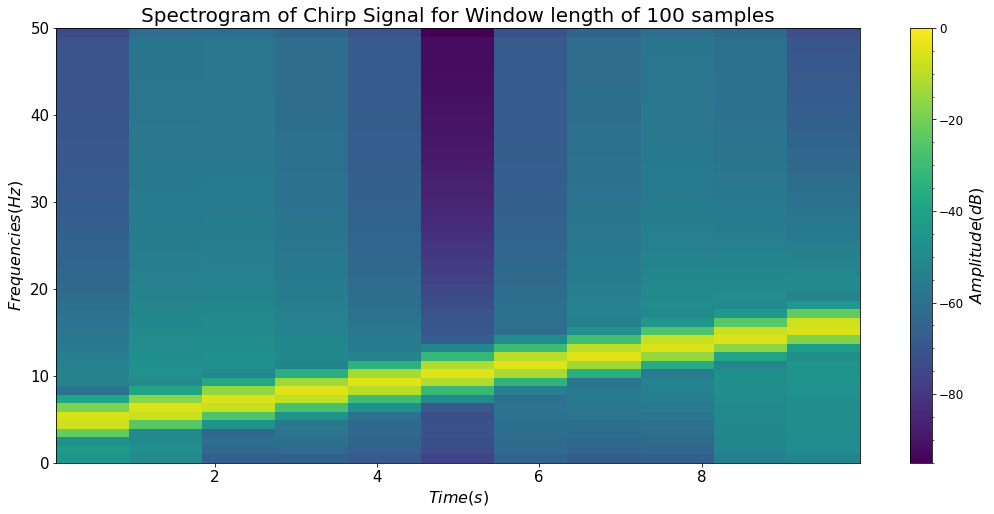

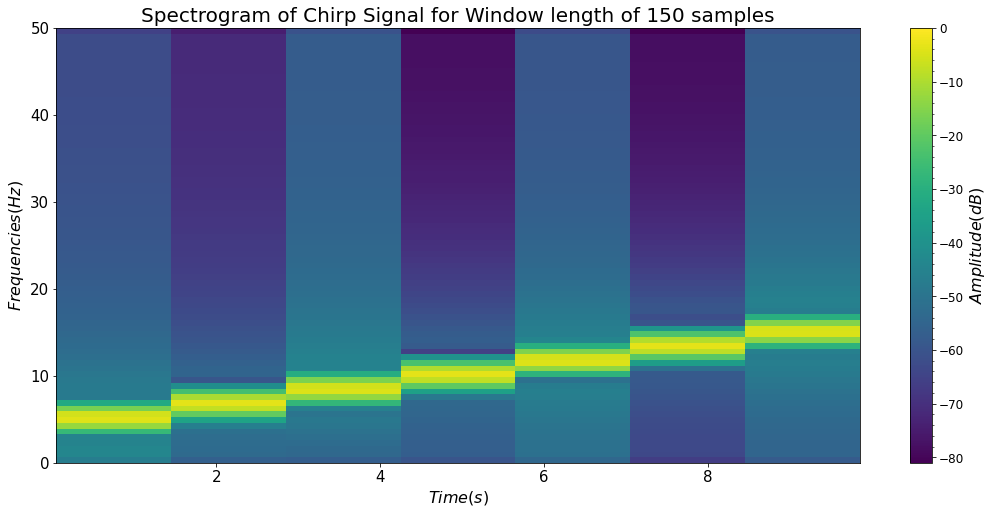

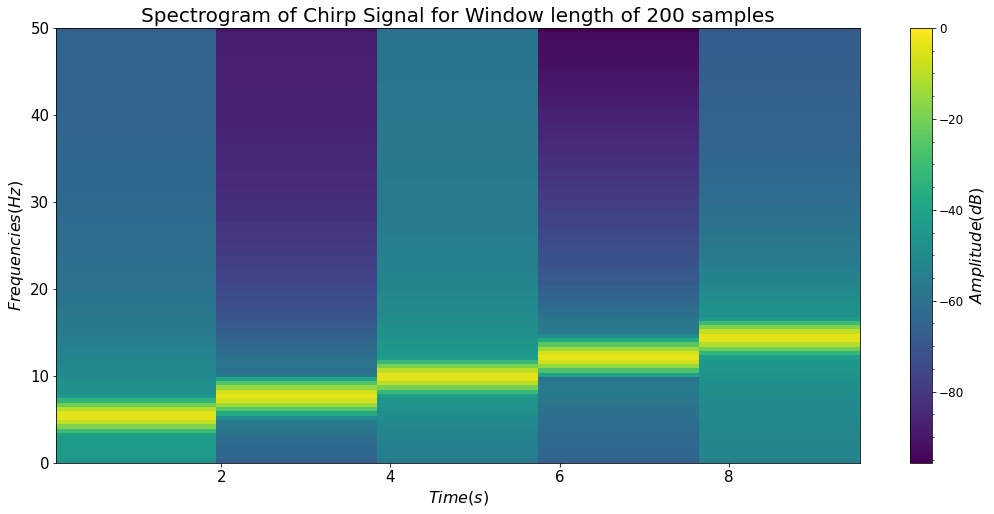

<Figure size 1296x576 with 0 Axes>

In [340]:
plt.rcParams.update({
    "figure.figsize": (18,8),
    "font.size": 12})
spectrogram(signal, 100, fs, window='hamming', title = 'Spectrogram of Chirp Signal for Window length of 100 samples',savfile='q1_p3.png')
spectrogram(signal, 150, fs, window='hamming', title = 'Spectrogram of Chirp Signal for Window length of 150 samples',savfile='q1_p4.png')
spectrogram(signal, 200, fs, window='hamming', title = 'Spectrogram of Chirp Signal for Window length of 200 samples',savfile='q1_p5.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  """


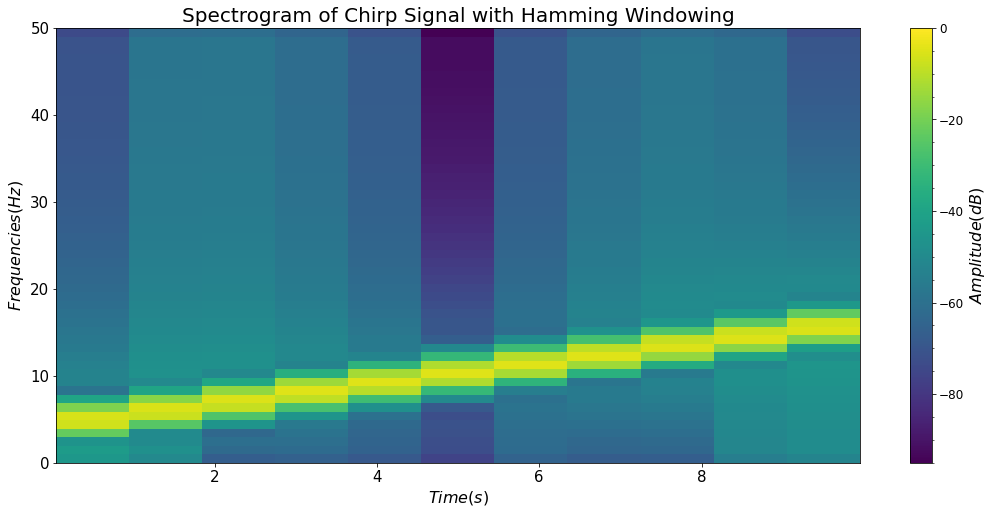

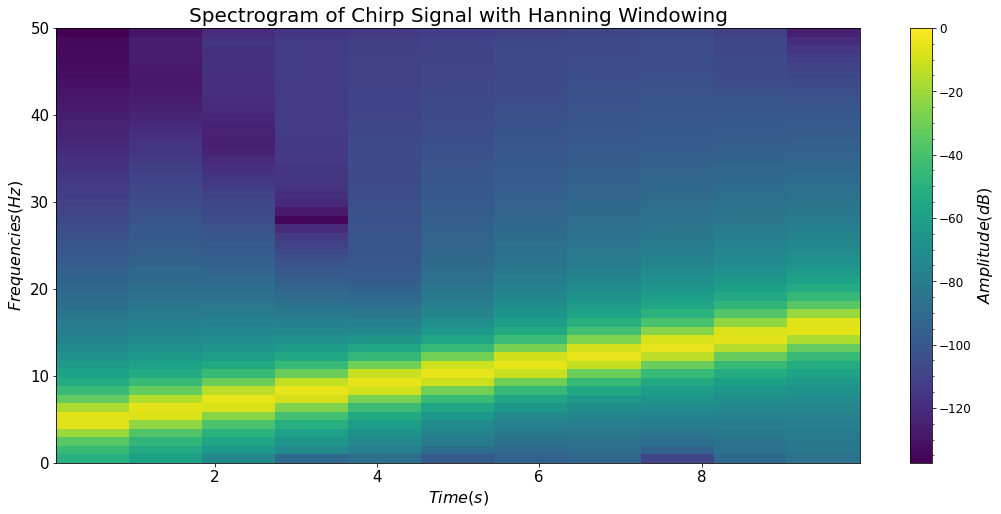

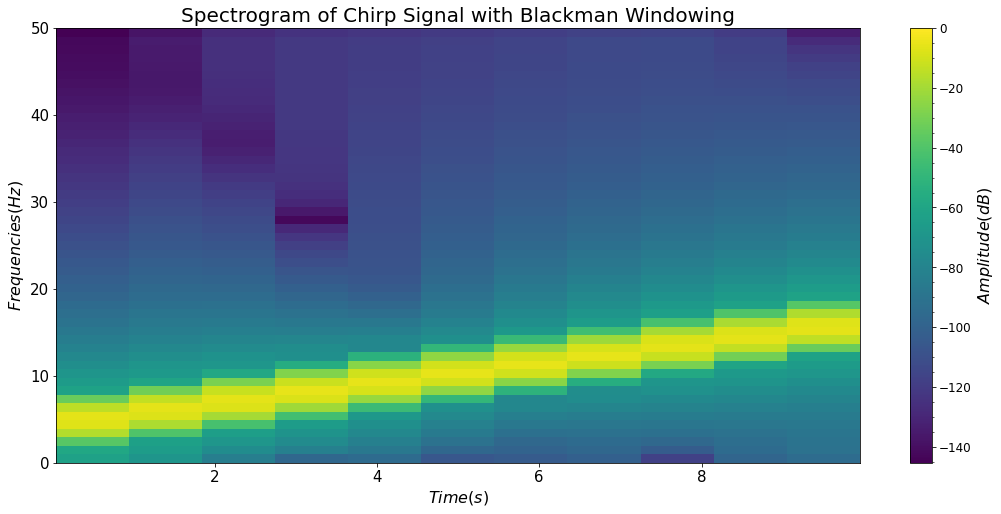

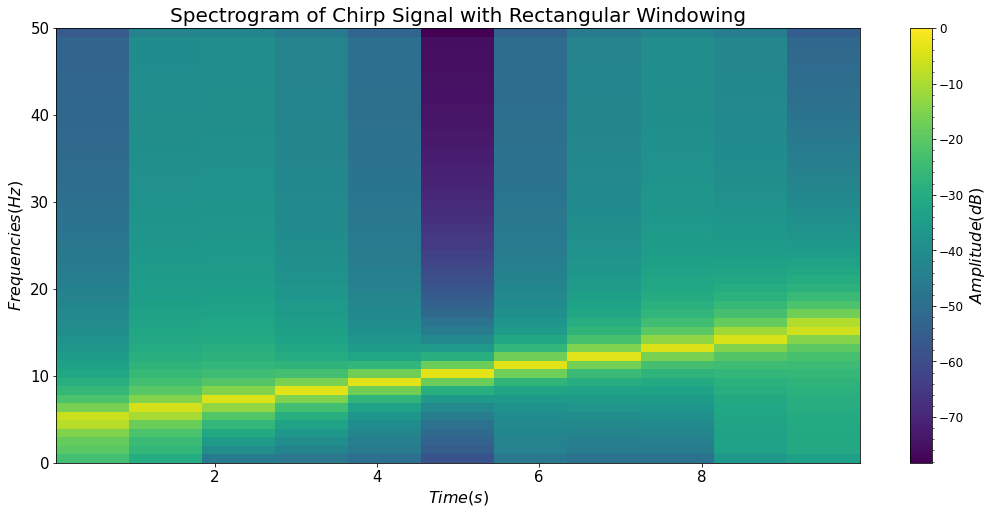

<Figure size 1296x576 with 0 Axes>

In [341]:
spectrogram(signal, Nos, fs, window='hamming', title = 'Spectrogram of Chirp Signal with Hamming Windowing', savfile='q1_p6.png')
spectrogram(signal, Nos, fs, window='hanning', title = 'Spectrogram of Chirp Signal with Hanning Windowing', savfile='q1_p7.png')
spectrogram(signal, Nos, fs, window='blackman', title = 'Spectrogram of Chirp Signal with Blackman Windowing', savfile='q1_p8.png')
spectrogram(signal, Nos, fs, window=None, title = 'Spectrogram of Chirp Signal with Rectangular Windowing', savfile='q1_p9.png')

# Problem 2

Part 1 :

In [342]:
def spectrogram(y, Nos, fs, window=None, title=None,savfile = None):
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = plt.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  plt.title(title, fontsize = 20)
  plt.xlabel(r'$Time(s)$', fontsize = 16)
  plt.ylabel(r'$Frequencies(Hz)$', fontsize = 16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude(dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  plt.savefig(savfile)
  plt.figure()
  

Sampling rate : 11025Hz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


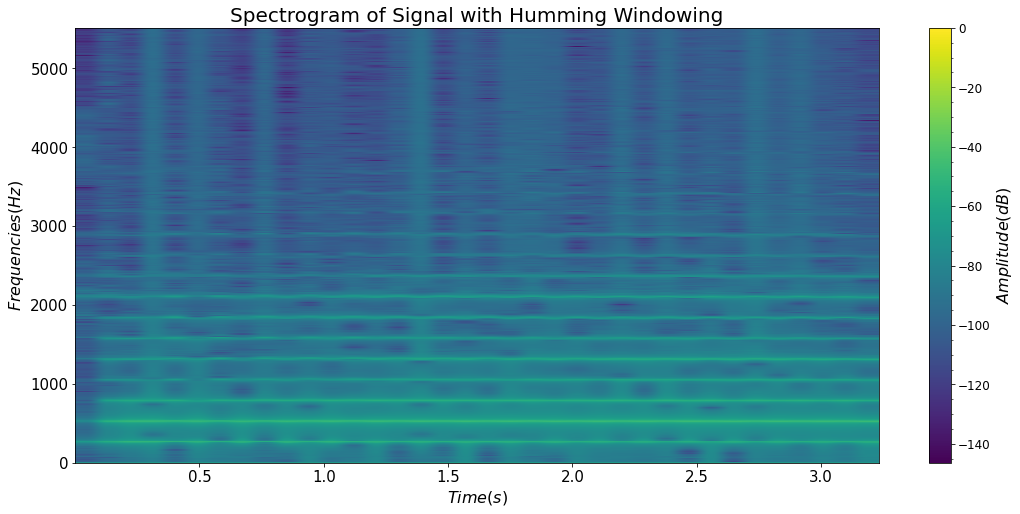

<Figure size 1296x576 with 0 Axes>

In [343]:
fs1, track= wavfile.read('instru1.wav')
track = track/32767.0
Nos = 1000
print('Sampling rate : {}Hz'.format(fs1))



spectrogram(track, Nos, fs1, window='humming', title = 'Spectrogram of Signal with Humming Windowing', savfile='q2_p1.png')

display(Audio(data=track, rate=fs1))

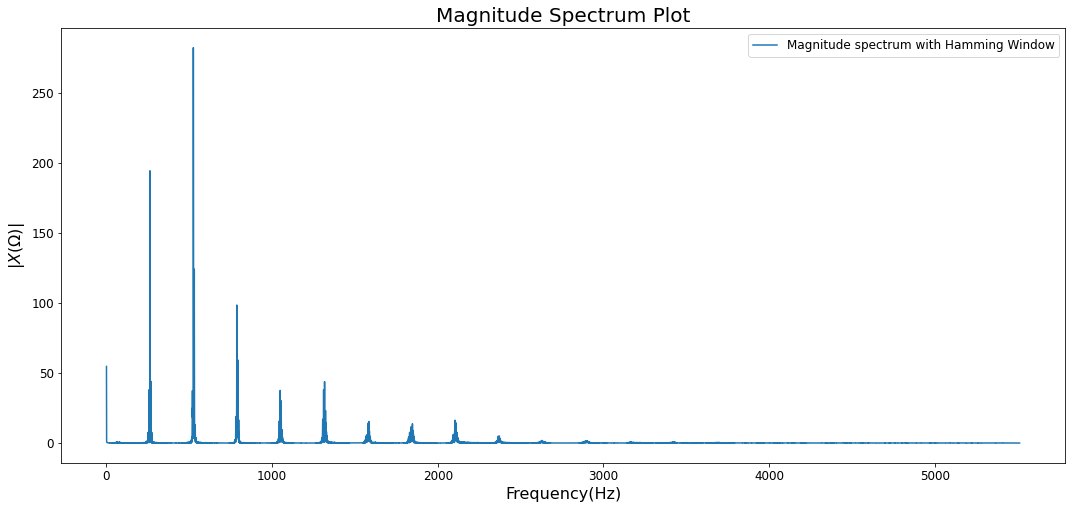

<Figure size 1296x576 with 0 Axes>

In [344]:
plot_mag(track, fs1, fs1/2,'Magnitude spectrum with Hamming Window',savfile = 'q2_p2.png')

In [345]:
X = fft(track)
X = X/np.max(np.abs(X))
for i in range (len(X)):
  if (np.abs(X[i])<=0.1):
    X[i]=0;
  elif (i==0):
    X[i]=0 
peaks = sp.find_peaks(np.abs(X))[0] 
fundamental_frequency = (peaks[0]/len(X)) * fs1

print('The Fundamental frequency of the instru1 audio signal: {} Hz'.format(fundamental_frequency))

The Fundamental frequency of the instru1 audio signal: 256.69241379310347 Hz


Part 2 :

Sampling rate of opera : 44100Hz


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


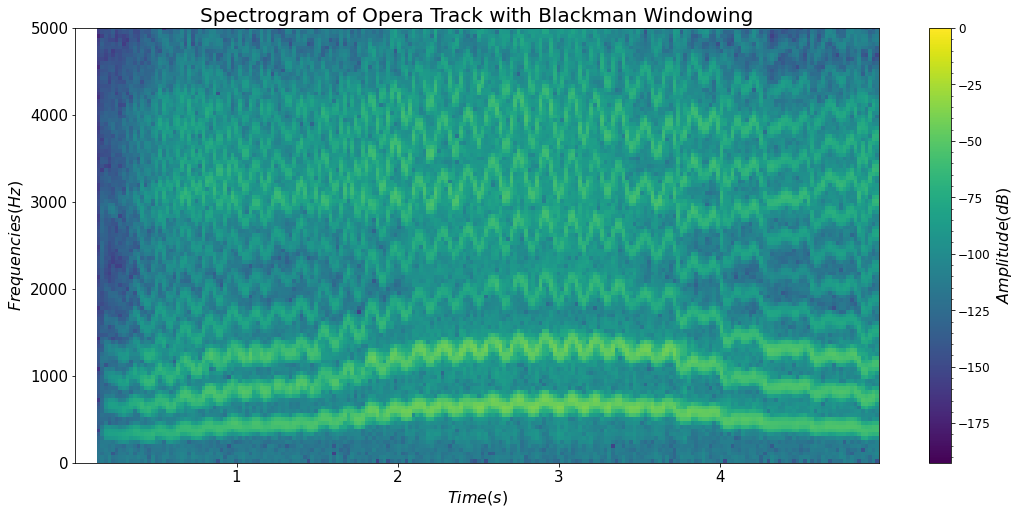

<Figure size 1296x576 with 0 Axes>

In [346]:
fs2, opera= wavfile.read('Opera.wav')
opera = opera/32767.0
Nos = 1000

def spectrogram(y, Nos, fs, window=None, title=None,savfile = None):
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = plt.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  plt.title(title, fontsize = 20)
  plt.xlabel(r'$Time(s)$', fontsize = 16)
  plt.ylabel(r'$Frequencies(Hz)$', fontsize = 16)
  ax = plt.axes()
  ax.set_ylim((0, 5000))
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude(dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  plt.savefig(savfile)
  plt.figure()
  
print('Sampling rate of opera : {}Hz'.format(fs2))

display(Audio(data=opera, rate=fs2))

spectrogram(opera, Nos, fs2, window='blackman', title = 'Spectrogram of Opera Track with Blackman Windowing', savfile='q2_p3.png')

# Problem 3

In [347]:
def spectrogram(y, Nos, fs, window=None, title=None,savfile = None):
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = plt.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB')
  plt.title(title, fontsize = 20)
  plt.xlabel(r'$Time(s)$', fontsize = 16)
  plt.ylabel(r'$Frequencies(Hz)$', fontsize = 16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label(r'$Amplitude(dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  plt.savefig(savfile)
  plt.figure()

In [348]:
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: {sampleRate: 4000} })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3, filename='recording.wav'):
  try:
    from google.colab import output
  except ImportError:
    print('No possible to import output from google.colab')
    return ''
  else:
    print('Recording')
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    print('Saving to', filename)
    b = base64.b64decode(s.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(b)
    return filename

Sampling rate : 4000Hz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


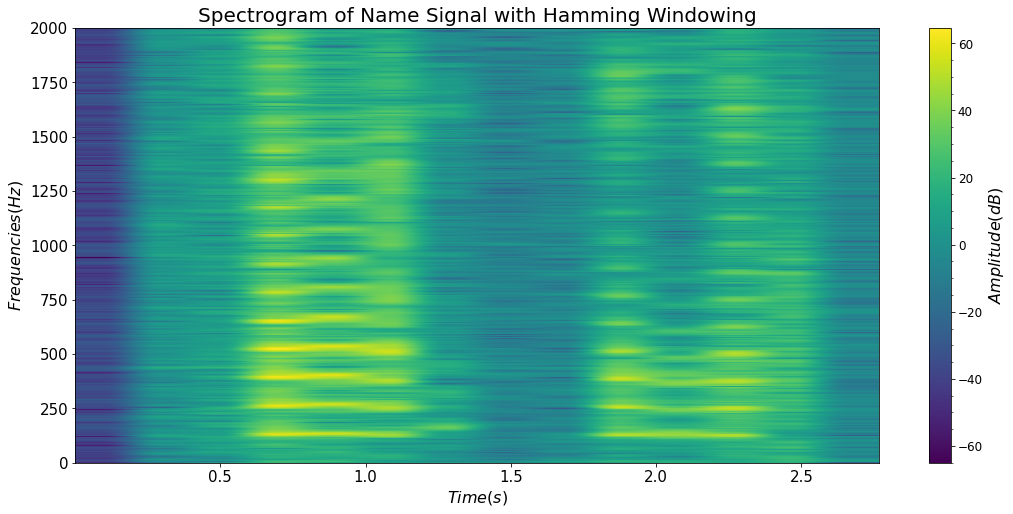

<Figure size 1296x576 with 0 Axes>

In [349]:
filen = 'recording.wav'

# Record function records the audio with 4000 Hz sampling rate
# Remove comments to  run the function

#record(filename = filen)
fs = 4000

audio = AudioSegment.from_file(filen)
audio = audio.set_frame_rate(fs).set_channels(1)
audio.export('name_recording.wav', format="wav")

fs, name = wavfile.read('name_recording.wav')
name = name/32767.0
print('Sampling rate : {}Hz'.format(fs))
Nosn = 800

display(Audio(data=name, rate=fs))

spectrogram(name, Nosn, fs, window='hamming', title = 'Spectrogram of Name Signal with Hamming Windowing', savfile='q3_p1.png')
